In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

from scipy import stats


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [1]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process, set_config
# from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, Normalizer
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_boston
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from scipy import stats as stats
from pandas.plotting import scatter_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report, confusion_matrix, matthews_corrcoef
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')

In [2]:
df = pd.read_csv('../notebooks/numeric_iphones_cleaned.csv')

NameError: name 'pd' is not defined

In [ ]:
df = df.drop(df[df['price']<50].index)

In [ ]:
df = df.drop(columns = 'Unnamed: 0')

In [ ]:
m = np.mean(df['price'])
s = np.std(df['price'])
df = df[(df['price']>=m-2*s) & (df['price']<=m+2*s)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4476 entries, 0 to 6754
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             4476 non-null   object 
 1   price             4476 non-null   float64
 2   condition         4476 non-null   float64
 3   num_reviews       4476 non-null   float64
 4   pos_feedback_pct  4476 non-null   float64
 5   return_days       4476 non-null   float64
 6   model             4476 non-null   int64  
 7   capacity          4476 non-null   float64
 8   release_year      4476 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 349.7+ KB


In [ ]:
df.describe(include='all')

,title,price,condition,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
count,4476,4476.000000,4476.000000,4.476000e+03,4476.00000,4476.000000,4476.000000,4476.000000,4476.000000
unique,4189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,apple iphone xr - 64gb - black (unlocked) a198...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,229.004783,2.223414,1.200159e+05,98.94122,1.830206,11.194817,92.154456,2016.821716
std,NaN,137.814930,1.892684,4.906560e+05,1.91222,0.966588,2.828590,82.281759,1.735063
min,NaN,50.000000,0.000000,0.000000e+00,50.00000,0.000000,1.000000,8.000000,2009.000000
25%,NaN,118.600000,1.000000,7.440000e+02,98.40000,2.000000,9.000000,64.000000,2016.000000
50%,NaN,200.970000,1.000000,8.258000e+03,99.40000,2.000000,11.000000,64.000000,2017.000000
75%,NaN,308.660000,4.000000,5.611200e+04,100.00000,2.000000,14.000000,128.000000,2018.000000


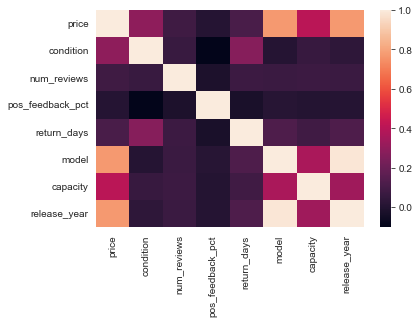

In [ ]:
sns.heatmap(df.corr());

In [ ]:
X = df.drop(columns=['price', 'title'])
y = df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [ ]:
ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(scaled_X_train, y_train)
y_pred = lr.predict(scaled_X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

r_squared = r2_score(y_test, y_pred)
r_squared

print('RMSE: '+str(rmse))
print('R-Squared: '+str(r_squared))


RMSE: 73.39758265041462
R-Squared: 0.6952505651568501


In [ ]:
params = {
    "n_estimators": 500,
    "max_depth": 6,
    "min_samples_split": 5,
    "learning_rate": 0.02,
    "loss": 'lad'
}

xgboostreg = GradientBoostingRegressor(**params)
xgboostreg.fit(scaled_X_train, y_train)

y_pred = xgboostreg.predict(scaled_X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print('RMSE: '+str(rmse))
print('R-Squared: '+str(r_squared))

RMSE: 57.19763348936756
R-Squared: 0.814930216607791


In [ ]:
# #split the dataset into training (70%) and testing (30%) sets
# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0) 

# #scale the training and testing data
# X_reduced_train = pca.fit_transform(scale(X_train))
# X_reduced_test = pca.transform(scale(X_test))[:,:1]

# #train PCR model on training data 
# regr = LinearRegression()
# regr.fit(X_reduced_train[:,:1], y_train)

# #calculate RMSE
# pred = regr.predict(X_reduced_test)
# np.sqrt(mean_squared_error(y_test, pred))

Text(0.5, 1.0, 'hp')

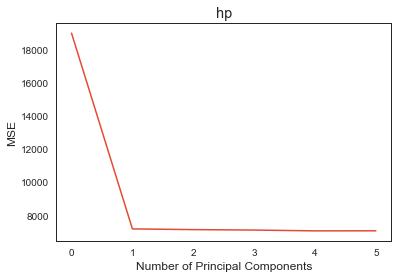

In [ ]:
#scale predictor variables
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('hp')

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)


array([ 32.03,  50.55,  64.58,  78.37,  89.73,  99.83, 100.01])

In [ ]:
X

,condition,num_reviews,pos_feedback_pct,return_days,model,capacity,release_year
0,1.0,30470.0,99.9,2.0,10,78.541106,2016
1,2.0,2703.0,97.2,2.0,11,64.000000,2017
2,1.0,13103.0,96.3,2.0,11,64.000000,2017
3,1.0,13103.0,96.3,2.0,10,32.000000,2016
4,3.0,332288.0,98.4,3.0,12,64.000000,2017
...,...,...,...,...,...,...,...
6750,0.0,168.0,100.0,0.0,8,56.774194,2015
6751,1.0,2116.0,100.0,2.0,7,16.000000,2014
6752,1.0,136775.0,98.8,2.0,7,16.000000,2014
6753,1.0,884.0,100.0,2.0,7,128.000000,2014


In [4]:
import ipywidgets as widgets
from IPython.display import display, clear_output

In [5]:
grand = widgets.ToggleButtons(
            options=['grandson', 'granddaughter']
        )

        

In [6]:
name = widgets.Text(placeholder='Your name here')

In [7]:
date = widgets.DatePicker(description='Pick a Date')


In [8]:
friends = widgets.IntSlider(
            value=3, 
            min=0, 
            max=10,
            step=1,
            style={'description_width': 'initial'} 
          )

In [9]:
button_send = widgets.Button(
                description='Send to grandma',
                tooltip='Send',
                style={'description_width': 'initial'}
            )

output = widgets.Output()

def on_button_clicked(event):
    with output:
        clear_output()
        print("Sent message: ")
        print(f"Dear Grandma! This is your favourite {grand.value}, {name.value}.")
        print(f"I would love to come over on {date.value} for dinner, if that's okay for you!")
        print(f"Also, if you don't mind, I'll bring along {friends.value} hungry ghosts for your delicious food!")

button_send.on_click(on_button_clicked)

vbox_result = widgets.VBox([button_send, output])

In [10]:
vbox_result